image.png

In [ ]:
import numpy as np


Here, $f(\mathbf{x}) = x_1^2 + 4x_1 x_2 +  1600x_2^2$


$\therefore f_{x_1}(\mathbf{x}) = 2x_1 + 4x_2$


$\therefore f_{x_1^2}(\mathbf{x}) = 2$


$\therefore f_{x_1x_2}(\mathbf{x}) = 4$


$\therefore f_{x_2}(\mathbf{x}) = 4x_1 + 3200x_2$


$\therefore f_{x_2^2}(\mathbf{x}) = 3200$


$\therefore f_{x_2x_1}(\mathbf{x}) = 4$

$\therefore\nabla^2 f(\mathbf{x}) =
\begin{bmatrix}
  f_{x_1^2}(\mathbf{x}) &
    f_{x_1x_2}(\mathbf{x})  \\
  f_{x_2x_1}(\mathbf{x}) &
    f_{x_2^2}(\mathbf{x})
\end{bmatrix}
=
\begin{bmatrix}
  2 & 4 \\ 4 & 3200
\end{bmatrix}$


To find the $\textbf{conditional number} \hspace{2mm} \kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, we have a built-in function in the numpy package.where  λ is eigen vlaue of hessian .

In [ ]:
def fx(x):
  fx=x[0]**2+4*x[0]*x[1]+1600*x[1]**2
  return np.array(fx)
def grad_fx(x):
  grad=[2*x[0]+4*x[1],4*x[0]+3200*x[1]]
  return np.array(grad)
def hes_fx(x):
  hes=[[2,4],[4,3200]]
  return np.array(hes)
x=[1,1600]
k=0
tau=1e-4
#pk=-grad_fx(x)
#while np.linalg.norm(pk)>tau:



In [ ]:
#ANS-1
grad_fx([100,100])


array([   600, 320400])

**

In [ ]:
def cond_no(x):
  w, v = np.linalg.eig(hes_fx(x))
  max_ev=np.max(w)
  min_ev=np.min(w)
  condition_no=max_ev/min_ev
  return condition_no
cond_no([1,1])
print(f'condition number ={cond_no([0,0])}')

condition number =1604.015040725209


We found the minimizer and the munimum function value of $f(\mathbf{x})$ by using partial derivatives and hessian we found that hesian is positive definite therefore the $f(\mathbf{x})$ has minimum value at the value obtained from partial derivative are given  as follows:
*   Minimizer: $(0, 0)$
*   Minimum function value: $0$

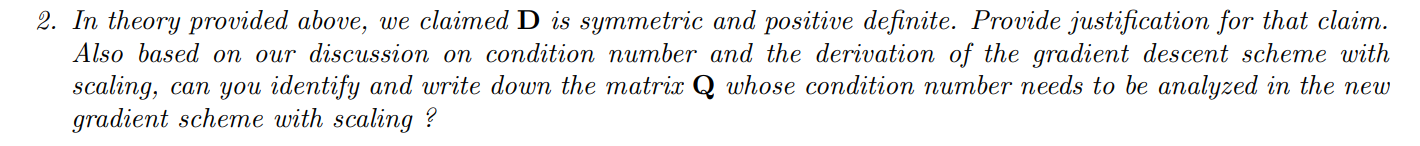

**Ans**
Diagonal approximation to the Hessian matrix $\nabla^2f( \mathbf{x})$, i.e., the diagonal matrix $\mathbf{D}^k$ that has the inverse second partial derivatives $\Big(\frac{\partial^2f(\mathbf{x_k})}{(\partial x_i)^2}\Big)^{-1}$ along the diagonal. This improves the performance of the gradient method dramatically, by providing automatic scaling of the units in which the components $x_i$ of $\mathbf{x}$ are measured. Because of such choice of $\mathbf{D}^k$, the condition number of $\mathbf{Q}$ is improving and becoming so close to $1$ so that our gradient descent scheme is converging so quickly. Here, product with inverse of diagonal elements of hessian matrix with hessian matrix is causing the improvements in $\mathbf{Q}$ by becoming so close to condition number of identity matrix. This is so helpful in fasterness of the algorithm.

$\therefore \mathbf{D^k} =
\begin{bmatrix}
  \frac{1}{2} & 0 \\ 0 & \frac{1}{3200}
\end{bmatrix}$

The matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling with $\mathbf{D}^k$

$\mathbf{Q}$  = $(\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}$

Where, $\mathbf{H}^k = (\nabla^2f(\mathbf{x})) $ is the hessian of a function at each iteration.


Because of such choice of $\mathbf{Q}$, condition number of in the gradient descent scheme is decreasing almost to $1$ so that out algorithm with scaling becomes so fast.

In [ ]:
#finding Dk
def Dk(x):
  return np.array([[1/2,0],[0,1/3200]])



In [ ]:
rho=0.9
def backtracking(x,rho):
  gamma=0.5
  alpha=1
  #print(grad_fx(x))

  pk=-1*np.array(grad_fx(x))

  k=0
  while np.array(fx(np.array(x)+alpha*pk))>(np.array(fx(x))+gamma*alpha*(np.array(grad_fx(x))@pk)):
    alpha=rho*alpha
    k+=1


  return alpha
backtracking([100,100],rho)

0.0002996906728784534

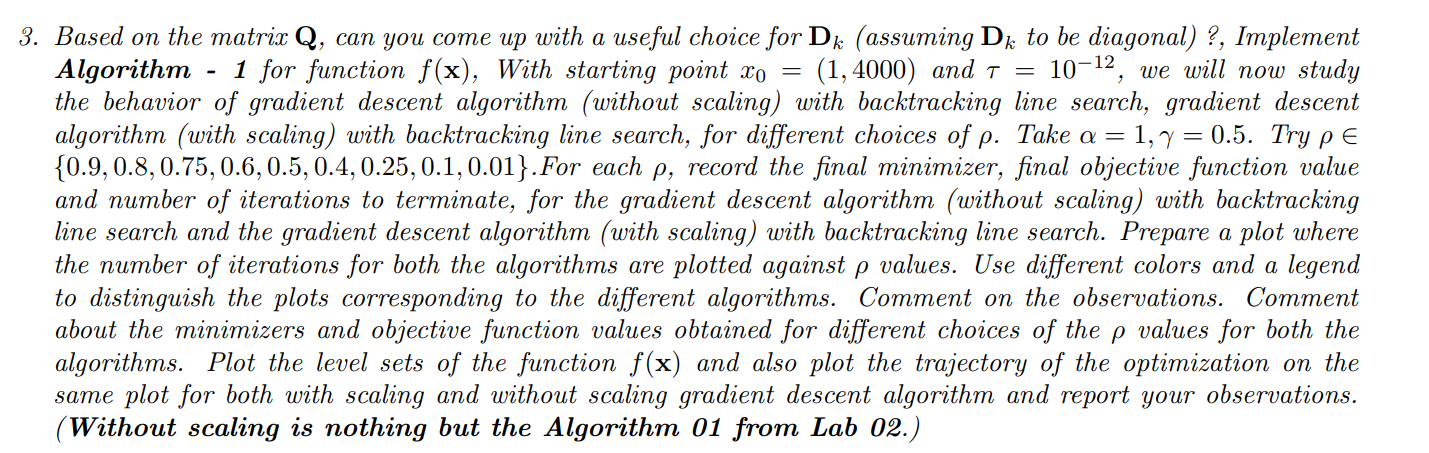

In [ ]:
#without scaling back track

def grad_descent_without_scale(x0):
  iteration=[]
  optimizers=[]
  optimal_value=[]
  rho=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
  tau=1e-12
  x_all=[]
  for r in rho:
    tau=1e-12
    #alpha=backtracking(x0,r)
    cor=[]
    x=np.array(x0)
    pk=-grad_fx(x)
    fx_norm=np.linalg.norm(pk)
    #print(fx_norm)
    k=0

    while fx_norm>tau:
      alpha=backtracking(x,r)
      cor.append(x)
      x=x+alpha*pk
      pk=-grad_fx(x)
      fx_norm=np.linalg.norm(pk)

      k=k+1

    iteration.append(k)
    optimizers.append(x)
    optimal_value.append(fx(x))
    x_all.append(cor)
  return iteration,optimizers,optimal_value,x_all
x=[1,4000]
grad_descent_without_scale(x)

([3583, 1331, 538, 5615, 16981, 5961, 15287, 37849, 13538],
 [array([-4.86897154e-13,  5.56578299e-16]),
  array([-4.79006925e-13,  5.77859847e-16]),
  array([-4.12345553e-13,  4.98693146e-16]),
  array([-4.86809153e-13,  6.52330287e-16]),
  array([-4.77038750e-13,  6.86254384e-16]),
  array([-4.92016016e-13,  6.63916164e-16]),
  array([-4.78952422e-13,  5.09080727e-16]),
  array([-4.44250589e-13,  6.83670379e-16]),
  array([-4.87654555e-13,  5.39105672e-16])],
 [array(2.364805e-25),
  array(2.28874714e-25),
  array(1.69604231e-25),
  array(2.36393766e-25),
  array(2.27010001e-25),
  array(2.41478386e-25),
  array(2.28834781e-25),
  array(1.96891551e-25),
  array(2.37220391e-25)],
 [[array([   1, 4000]),
   array([ -3.79565015, 163.95818839]),
   array([-3.98992206,  6.72517111]),
   array([-3.99559246,  0.2804467 ]),
   array([-3.99353377,  0.01628523]),
   array([-3.99115964,  0.00545483]),
   array([-3.92168069, -0.00755693]),
   array([-3.91932105,  0.00439141]),
   array([-3.86402

In [ ]:
x=[1,4000]
def arg_eta(x):
  n=(2*x[0]*(x[0]+2*x[1])+4*x[0]*(800*x[1]+x[0])+4*x[1]*(x[0]+2*x[1])+3200*x[1]*(800*x[1]+x[0]))/((x[0]+2*x[1])**2+2*((x[0]+2*x[1])*(800*x[1]+x[0]))+3200*((800*x[1]+x[0])**2))
  if n>=0:
    n=n
  if n<0:
    n=0
  return n

arg_eta(x)

0.0012500019514105828

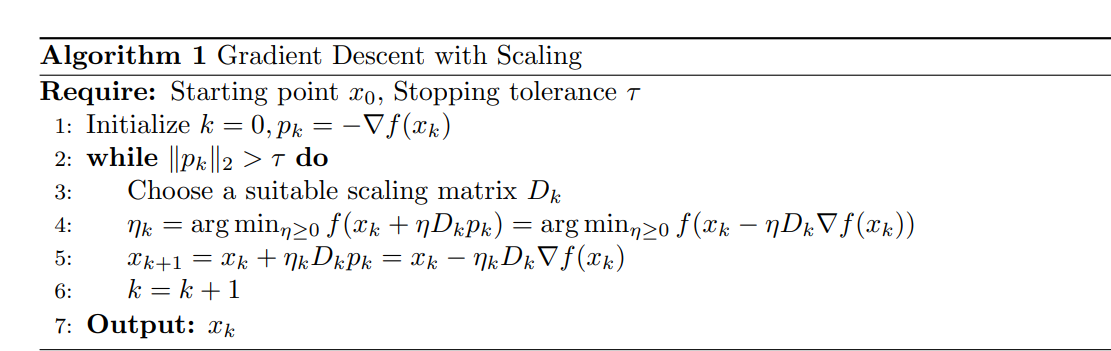

In [ ]:
def get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -grad_fx(xk)
  while fx(xk + alpha*Dk@pk) > (fx(xk) + gamma*alpha*grad_fx(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha
dk=Dk([1,1600])
get_alpha_with_scaling([1,1600], 1, 0.9, 0.5, dk)

0.9

In [ ]:
#with scale back track
def grad_descent_with_scale(x0):
  x_all=[]
  iteration=[]
  optimizers=[]
  optimal_value=[]

  rho=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
  for r in rho:
    tau=1e-12
    x=np.copy(np.array(x0))
    pk=-grad_fx(x)
    k=0


    gamma=0.5
    dk=np.array(Dk(x))
    cor=[]
    cor.append(x)

    fx_norm=np.linalg.norm(pk)
    while fx_norm>tau:
      alpha=get_alpha_with_scaling(x, 1, r, 0.5, dk)


      x=np.array(x+alpha*np.dot(dk,pk))
      cor.append(x)
      pk=-grad_fx(x)
      fx_norm=np.linalg.norm(pk)


      k=k+1


    optimizers.append(x)
    iteration.append(k)
    x_all.append(cor)
    optimal_value.append(fx(x))
  return iteration,optimizers,optimal_value,x_all
  x=[1,1600]
grad_descent_with_scale([1,4000])

([15, 16, 16, 16, 17, 17, 19, 25, 115],
 [array([-4.39447021e-15,  2.44139938e-16]),
  array([-9.76561279e-16,  4.88265991e-18]),
  array([-1.22070198e-15,  4.57744598e-18]),
  array([-1.95312408e-15,  3.66180420e-18]),
  array([-1.22375412e-15,  3.05156660e-18]),
  array([-1.75976489e-15,  2.92941254e-18]),
  array([-1.54752679e-15,  2.57539411e-18]),
  array([-1.70489582e-15,  2.36523646e-18]),
  array([-1.78952383e-15,  2.25730189e-18])],
 [array(1.10386801e-28),
  array(9.72743654e-31),
  array(1.50128735e-30),
  array(3.80753995e-30),
  array(1.49753597e-30),
  array(3.0898825e-30),
  array(2.38950944e-30),
  array(2.89949079e-30),
  array(3.19439023e-30)],
 [[array([   1, 4000]),
   array([-7199.9     ,   399.998875]),
   array([-799.99775 ,    8.999875]),
   array([-17.99975   ,   0.99999719]),
   array([-1.99999437,  0.02249969]),
   array([-0.04499937,  0.00249999]),
   array([-4.99998594e-03,  5.62492187e-05]),
   array([-1.12498437e-04,  6.24998242e-06]),
   array([-1.249996

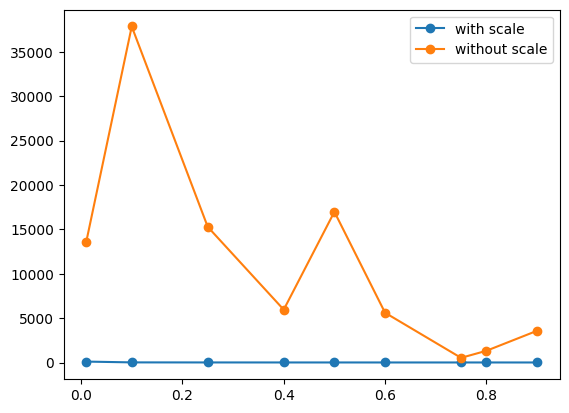

In [ ]:
import matplotlib.pyplot as plt
rho=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
plt.plot(rho,grad_descent_with_scale([1,4000])[0],marker='o',label='with scale')#grad_descent_without_scale(x)
plt.plot(rho,grad_descent_without_scale([1,4000])[0],marker='o', label = 'without scale')
plt.legend()
plt.show()

observation:
here we can see that the grad descent with scaling is very much faster than grad descent without sacling and by plotting the iterations with values of rho we observe that at a certain value of rho we found convergence of iteration and after that point we move away from that point.


[1, -7199.900000000001, -799.9977499999995, -17.999750000000063, -1.9999943749999982, -0.04499937499999995, -0.004999985937499993, -0.00011249843749999971, -1.2499964843749984e-05, -2.8124609374999873e-07, -3.1249912109374946e-08, -7.031152343749992e-10, -7.81247802734374e-11, -1.7577880859375047e-12, -1.953119506835935e-13, -4.394470214843766e-15]


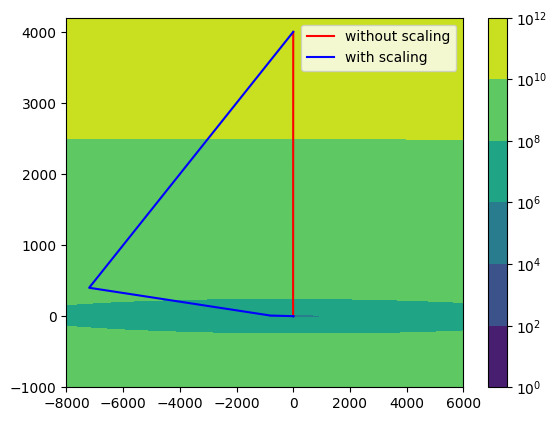

[1, -6399.8, -1599.9979999999996, -15.999500000000126, -3.9999949999999984, -0.03999875000000008, -0.009999987499999995, -9.99968749999993e-05, -2.4999968749999987e-05, -2.4999218749999664e-07, -6.249992187499995e-08, -6.249804687499926e-10, -1.5624980468749986e-10, -1.5624511718749661e-12, -3.906245117187497e-13, -3.906127929687397e-15, -9.76561279296874e-16]


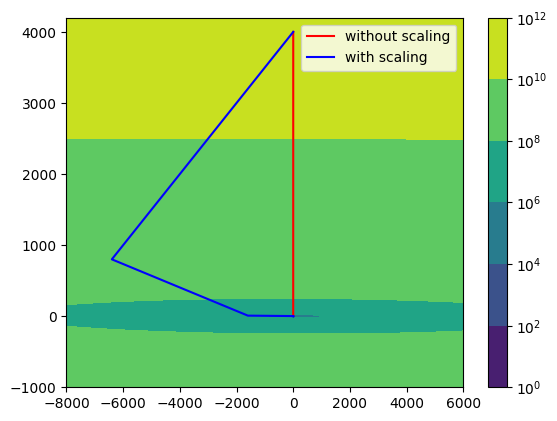

[1, -5999.75, -1999.998125, -14.9993750000001, -4.999995312499999, -0.03749843750000004, -0.012499988281249999, -9.374609374999954e-05, -3.1249970703125e-05, -2.343652343749956e-07, -7.81249267578125e-08, -5.859130859374927e-10, -1.9531231689453125e-10, -1.464782714843742e-12, -4.88280792236328e-13, -3.661956787109339e-15, -1.22070198059082e-15]


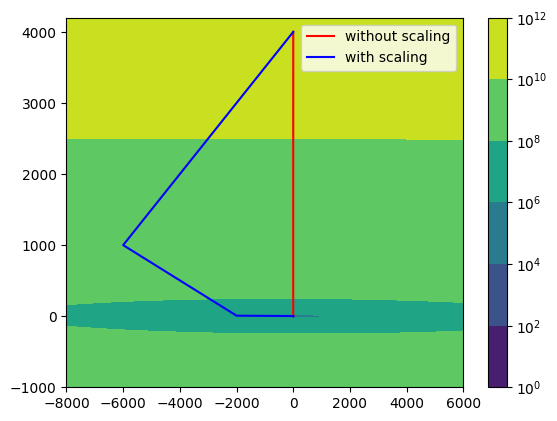

[1, -4799.599999999999, -3199.9984999999997, -11.999000000000251, -7.999996249999999, -0.029997500000000343, -0.019999990625, -7.49937499999985e-05, -4.9999976562499994e-05, -1.8748437499999245e-07, -1.2499994140625e-07, -4.687109374999928e-10, -3.12499853515625e-10, -1.1717773437499923e-12, -7.812496337890625e-13, -2.929443359375013e-15, -1.9531240844726565e-15]


[1, -3999.5, -3999.749375, -2004.9987499999997, -9.999373437500026, -5.012496874999999, -0.024998433593749425, -0.012531242187499998, -6.24960839843737e-05, -3.1328105468749994e-05, -1.5624020996093425e-07, -7.832026367187498e-08, -3.9060052490233193e-10, -1.9580065917968745e-10, -9.765013122558174e-13, -4.895016479492187e-13, -2.4412532806394587e-15, -1.2237541198730467e-15]


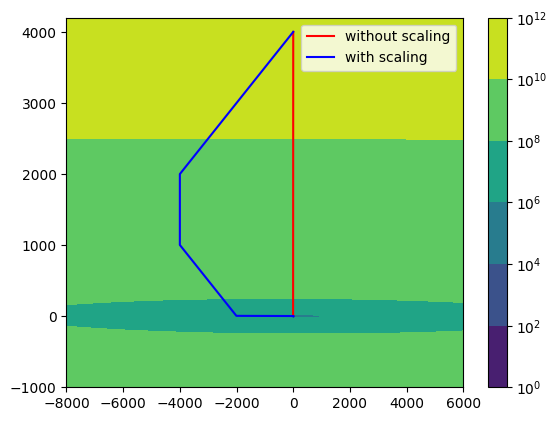

[1, -3199.4, -3839.6396, -2883.1987999999997, -9.599099000000479, -7.207996999999999, -0.023997747500001054, -0.0180199925, -5.999436875000347e-05, -4.504998125e-05, -1.4998592187501247e-07, -1.1262495312499999e-07, -3.7496480468752375e-10, -2.8156238281249997e-10, -9.374120117188011e-13, -7.039059570312499e-13, -2.3435300292969826e-15, -1.7597648925781248e-15]


[1, -1999.25, -2999.43734375, -3374.8902734374997, -3375.6205663818355, -2535.467890332031, -8.43905141595451, -6.338669725830077, -0.02109762853988606, -0.015846674314575194, -5.274407134971473e-05, -3.961668578643798e-05, -1.3186017837428493e-07, -9.904171446609496e-08, -3.2965044593571975e-10, -2.476042861652374e-10, -8.241261148393138e-13, -6.190107154130934e-13, -2.060315287098208e-15, -1.5475267885327336e-15]


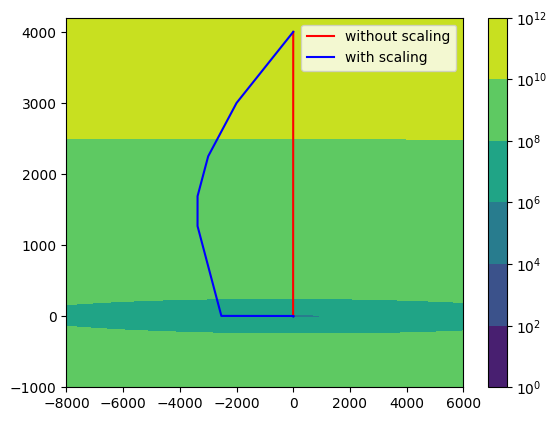

[1, -799.1, -1439.189975, -1943.2909325, -2332.215778499375, -2623.9713282471876, -2834.111915654906, -2976.0502715818157, -3061.3306899646855, -3099.8689232119527, -3100.1627361773685, -2793.301314810304, -7.750406840443247, -6.98325328702576, -0.01937601710110748, -0.0174581332175644, -4.844004275276689e-05, -4.3645333043911005e-05, -1.211001068819186e-07, -1.0911333260977752e-07, -3.0275026720479435e-10, -2.727833315244438e-10, -7.568756680119776e-13, -6.819583288111095e-13, -1.892189170029952e-15, -1.7048958220277736e-15]


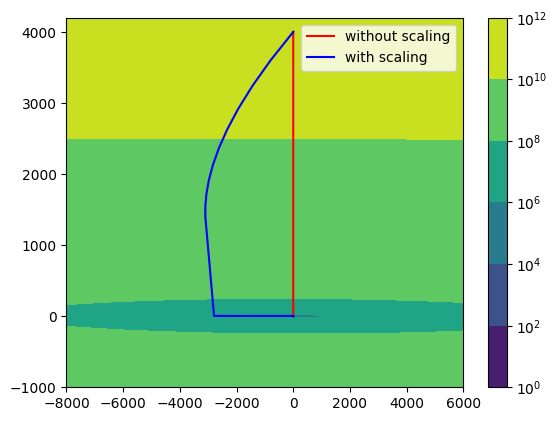

[1, -79.01, -157.41989975, -234.2537202575, -309.53516171984995, -383.28760754435723, -455.53412831999276, -526.297485741263, -595.600136484808, -663.4642360392794, -729.911642489047, -794.9639202522744, -858.6423437738989, -920.9679011740458, -981.9612978523983, -1041.6429600490417, -1100.0330383622913, -1157.151411224011, -1213.0176883329198, -1267.6512140463808, -1321.0710707311614, -1373.2960820736453, -1424.344816349974, -1474.2355896565894, -1522.9864691016414, -1570.6152759577242, -1617.1395887763924, -1662.5767464649105, -1706.9438513256778, -1750.25777205877, -1792.5351467280304, -1833.7923856911427, -1874.0456744941068, -1913.3109767305389, -1951.6040368662116, -1988.940383029242, -2025.3353297663343, -2060.8039807654777, -2095.361231545494, -2129.0217721128283, -2161.8000895859695, -2193.71047078788, -2224.7670048068153, -2254.983585525911, -2284.3739141218957, -2312.9515015333045, -2340.7296708985514, -2367.7215599642154, -2393.940123463894, -2419.398135467972, -2444.108191

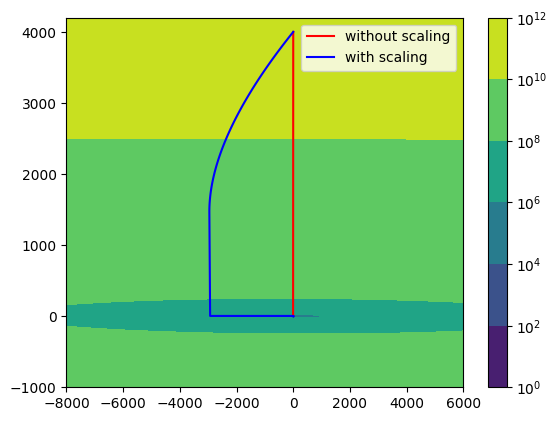

In [ ]:
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns
##Plotting Trajectory
coor= grad_descent_without_scale([1,4000])[3]
coor2=grad_descent_with_scale([1,4000])[3]
for i in range(len(rho)):
  x = np.linspace(-8000, 6000, 4000)
  y = np.linspace(-1000, 4200, 4000)
  X, Y = np.meshgrid(x, y)
  Z = fx((X,Y))
  p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())  #,locator = ticker.LogLocator()
  cbar = plt.colorbar(p)

  xcordinates1 = [xk1[0] for xk1 in coor[i]]
  ycordinates1 = [xk1[1] for xk1 in coor[i]]

  plt.plot(xcordinates1, ycordinates1, color='red', label = 'without scaling')
  xcordinates2 = [xk1[0] for xk1 in  coor2[i]]
  ycordinates2 = [xk1[1] for xk1 in coor2[i]]
  print(xcordinates2)
  plt.plot(xcordinates2, ycordinates2, color='blue', label = 'with scaling')
  plt.legend()
  plt.show()


Reducing the scale noticeably decreased the iteration count. This occurred due to the ill-conditioned nature of the Hessian. By scaling it with
D
k we effectively transformed it into an almost identity matrix. Decreasing
ρ further diminished the number of iterations required.

COMMENT:
By plotting the curves with both the gradient descent with scaling and without scaling it is clearly visiualised that in withot scaling their is greater number of iteration and it converges through a straight line whereas gradient descent with scaling we see that their is very low number of iteration for various rho in comaprision of without scaling and curves look like a loop where it decreases rapidly and converges very fast as compare to the other one (witthout) so for various rho the curve becomes most circular that means it decreases fast for specific rho very fast.In scaling it decreases very fast because in this algo. we can observe for various iteration coordinates moves on a curve and sudenly obtain optimal value whereas in without scaling the curve is straight line which shows that it decreases in straight line but alpha step length leads it to very slow for optimization.


In [ ]:
from scipy.linalg import fractional_matrix_power
#matrix Q
#finding Dk
x=[0,0]
def hes_fx(x):
  hes=[[2,4],[4,3200]]
  return np.array(hes)
def Dk(x):
  return np.array([[1/2,0],[0,1/3200]])
Q=fractional_matrix_power(Dk([0,0]),1/2)@hes_fx(x)@fractional_matrix_power(Dk([0,0]),1/2)
print(Q)

[[1.   0.05]
 [0.05 1.  ]]


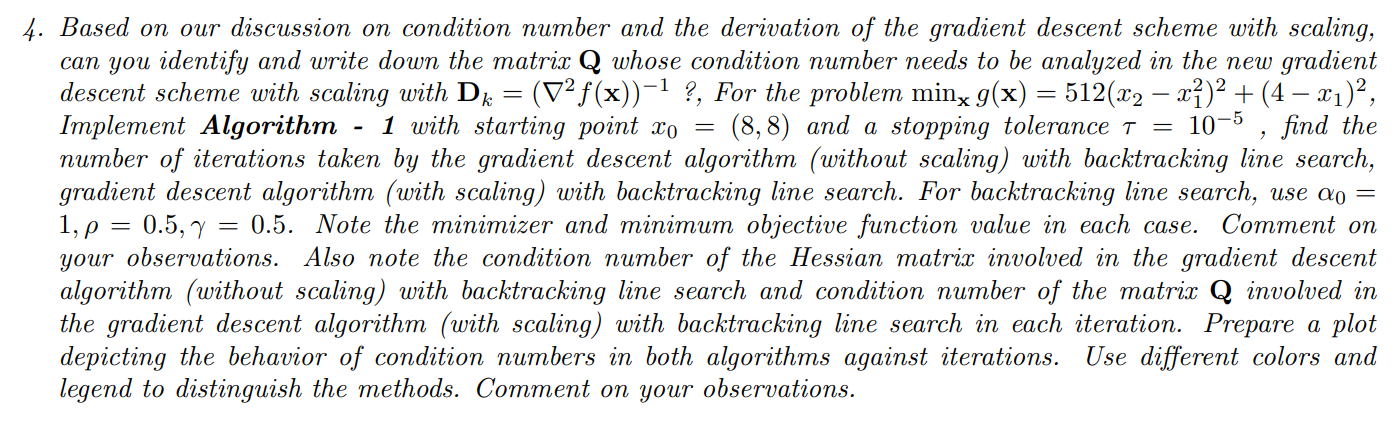

The matrix $\mathbf{Q}$ is given as:


$\mathbf{Q}$  = $(\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}$

Where, $\mathbf{H}^k = (\nabla^2f(\mathbf{x})) $ is the hessian of a function at each iteration.

In [ ]:
def gx(x):
  g=512*(x[1]-x[0]**2)**2+(4-x[0])**2
  return g
def grad_gx(x):
  grad= [-2048*x[0]*(x[1]-x[0]**2)-2*(4-x[0]),1024*(x[1]-x[0]**2)]
  return np.array(grad)
def hes_gx(x):
  hes=[[-2048*(x[1]-x[0]**2)+4096*x[0]**2+2,-2048*x[0]],[-2048*x[0],1024]]
  return np.array(hes)
def g_Dk(x):
  dk=np.linalg.inv(hes_gx(x))
  return dk


In [ ]:
rho=0.5
def backtracking_gx(x,rho):
  gamma=0.5
  alpha=1
  #print(grad_gx(x))

  pk=-1*np.array(grad_gx(x))

  k=0
  while np.array(gx(np.array(x)+alpha*pk))>(np.array(gx(x))+gamma*alpha*(np.array(grad_gx(x))@pk)):
    alpha=rho*alpha
    k+=1


  return alpha


In [ ]:
Q=fractional_matrix_power(Dk([0,0]),1/2)@hes_gx(x)@fractional_matrix_power(Dk([0,0]),1/2)
def cond_no_gx(x):
  w, v = np.linalg.eig(x)
  max_ev=np.max(w)
  min_ev=np.min(w)
  condition_no=max_ev/min_ev
  return condition_no
cond_no([1,1])
print(f'condition number ={cond_no([0,0])}')


condition number =1604.015040725209


In [ ]:
def get_alpha_with_scaling_gx(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  rho=0.5
  pk = -grad_gx(xk)
  while gx(xk + alpha*Dk@pk) > (gx(xk) + gamma*alpha*grad_gx(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha
dk=Dk([1,1600])
get_alpha_with_scaling([1,1600], 1, 0.9, 0.5, dk)

0.9

In [ ]:
#without scaling back track

def grad_descent_without_scale_gx(x0):
  iteration=[]
  each_iteration=[]
  optimizers=[]
  optimal_value=[]
  rho=[0.5]#, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
  tau=1e-12
  x_all=[]
  cond_no_hes=[]
  for r in rho:
    tau=1e-5
    #alpha=backtracking(x0,r)
    cor=[]
    x=np.array(x0)
    pk=-grad_gx(x)
    gx_norm=np.linalg.norm(pk)
    #print(gx_norm)
    k=0

    while gx_norm>tau:
      cond_no_hes.append(cond_no_gx(hes_gx(x)))
      alpha=backtracking_gx(x,r)
      cor.append(x)
      x=x+alpha*pk
      pk=-grad_gx(x)
      gx_norm=np.linalg.norm(pk)
      each_iteration.append(k)
      k=k+1

    iteration.append(k)
    optimizers.append(x)
    optimal_value.append(gx(x))
    x_all.append(cor)
  return iteration,optimizers,optimal_value,x_all,cond_no_hes,each_iteration
x=[8,8]
cond_no_without_scale=grad_descent_without_scale_gx(x)[4]
iteration_without_scale=grad_descent_without_scale_gx(x)[5]
coor=grad_descent_without_scale_gx(x)[3]

grad_descent_without_scale_gx(x)[4]

<ipython-input-14-15395327381c>:2: RuntimeWarning: overflow encountered in long_scalars
  g=512*(x[1]-x[0]**2)**2+(4-x[0])**2


[1213.714059716036,
 773.8266257611613,
 497.9864680564386,
 411.1460467779613,
 784.9820973192878,
 1613.445452090956,
 3428.616830236631,
 7361.853516046241,
 15752.25291580347,
 33092.17116532682,
 66699.68313942742,
 124423.21741829965,
 205651.41852259176,
 292880.79851875745,
 363137.3909265237,
 407747.85966899636,
 459205.3100266388,
 390003.25890277955,
 422670.43174802815,
 457634.3706115955,
 371270.33047586266,
 412409.9535781693,
 458777.2360941799,
 396112.43997937324,
 460661.88432287175,
 413259.4706457241,
 458728.4253743351,
 397209.49080562324,
 460576.2497710059,
 414062.061794704,
 458684.99493594863,
 398246.2010152172,
 460498.36154396634,
 414819.55683311535,
 458646.69010279234,
 399224.6972497117,
 460427.8553780291,
 415533.67401997803,
 458613.27509771567,
 400146.98619747703,
 460364.3943326699,
 416206.02432814945,
 458584.5318143416,
 401014.95748782065,
 460307.66701973754,
 416838.115462504,
 458560.2586904302,
 401830.38666430017,
 460257.3859612991,
 

In [ ]:
#with scale back track
def grad_descent_with_scale_gx(x0):
  x_all=[]
  iteration=[]
  each_iteration=[]
  optimizers=[]
  optimal_value=[]
  cond_no=[]
  rho=[0.5]#, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
  for r in rho:
    tau=1e-5
    x=np.copy(np.array(x0))
    pk=-grad_gx(x)
    k=0


    gamma=0.5
    dk=np.array(g_Dk(x))
    cor=[]
    cor.append(x)

    gx_norm=np.linalg.norm(pk)
    while gx_norm>tau:

      dk=np.array(g_Dk(x))
      Q=fractional_matrix_power(dk,1/2)@hes_gx(x)@fractional_matrix_power(dk,1/2)
      c=cond_no_gx(Q)
      alpha=get_alpha_with_scaling_gx(x, 1, 0.5, 0.5, dk)
      x=np.array(x+alpha*np.dot(dk,pk))
      cor.append(x)
      pk=-grad_gx(x)
      gx_norm=np.linalg.norm(pk)
      each_iteration.append(k)

      k=k+1

      cond_no.append(c)
      #print(cond_no)
    optimizers.append(x)
    iteration.append(k)
    x_all.append(cor)
    optimal_value.append(gx(x))
  return iteration,optimizers,optimal_value,x_all,cond_no,each_iteration
cond_no_with_scale=grad_descent_with_scale_gx([8,8])[4]
iteration_with_scale=grad_descent_with_scale_gx([8,8])[5]
coor2= grad_descent_with_scale_gx([8,8])[3]

print(f'Iteration:{grad_descent_with_scale_gx([8,8])[0]}')
print(f'optimizers:{grad_descent_with_scale_gx([8,8])[1]}')
print(f' optimal value:{grad_descent_with_scale_gx([8,8])[2]}')
print(f'Conditon_no: {grad_descent_with_scale_gx([8,8])[4]}')

Iteration:[48]
optimizers:[array([ 4., 16.])]
 optimal value:[2.356430075812841e-25]
Conditon_no: [1.0000000000000113, 1.0000000021417927, 1.0000000003530183, 1.0000000000478237, 1.0000000001038443, 1.0000000000714893, 1.0000000000703606, 1.0000000000466385, 1.0000000000778548, 1.0000000000202185, 1.0000000000110965, 1.0000000000040457, 1.0000000000737257, 1.0000000000721052, 1.0000000000172278, 1.000000000040959, 1.0000000000708256, 1.0000000000252283, 1.000000000019321, 1.0000000001416525, 1.0000000000235607, 1.0000000000361962, 1.000000000046515, 1.0000000000113052, 1.0000000000088478, 1.0000000000147176, 1.0000000000032578, 1.000000000016377, 1.0000000000144518, 1.0000000000582077, 1.0000000000015439, 1.0000000000128264, 1.0000000000551337, 1.0000000000090257, 1.000000000003487, 1.0000000000445846, 1.0000000001669553, 1.0000000000446279, 1.000000000035783, 1.0000000000971299, 1.0000000000188611, 1.0000000000863378, 1.0000000000498253, 1.0000000000364961, 1.0000000001234863, 1.00000

[8, 7.999930246752115, 7.874933049316728, 7.760959652575835, 7.592316866613062, 7.473061752453023, 7.361481777045532, 7.2016429491018865, 7.08376913719585, 6.9825138686046335, 6.822271704467423, 6.718868351957129, 6.6050973867577945, 6.473052772824391, 6.341885834699368, 6.2160975608346, 6.087272912558087, 5.971275213715139, 5.837886242605611, 5.742260819815355, 5.658204753379707, 5.529829272672484, 5.444248202419646, 5.359291410879714, 5.247331069054982, 5.157179682307304, 5.033049765687852, 4.971478202907109, 4.871983149430526, 4.805306910157629, 4.7327883350648765, 4.64818410401946, 4.5703677561518035, 4.491157858547243, 4.425006770980272, 4.3474647934211905, 4.298916286660251, 4.255132173256257, 4.193946756755683, 4.153821249419092, 4.124784102232961, 4.078356963142112, 4.053925465074946, 4.020456824639331, 4.010928876084139, 4.000929543615487, 4.0000863332175705, 4.00000006281071, 4.000000000000479]


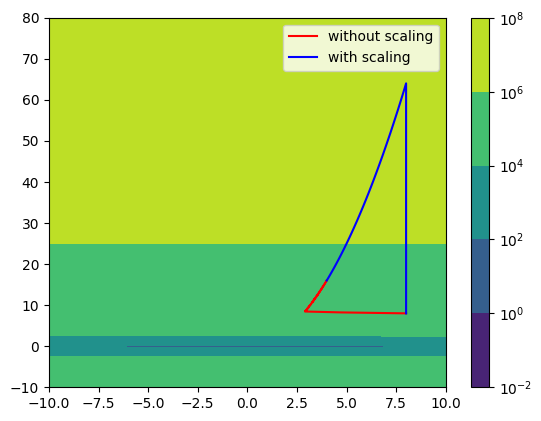

In [ ]:
##Plotting Trajectory
#coor= grad_descent_without_scale_gx([8,8])[3]
#coor2=grad_descent_with_scale_gx([8,8])[3]
for i in range(1):
  x = np.linspace(-10, 10, 4000)
  y = np.linspace(-10, 80, 4000)
  X, Y = np.meshgrid(x, y)
  Z = fx((X,Y))
  p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())  #,locator = ticker.LogLocator()
  cbar = plt.colorbar(p)

  xcordinates1 = [xk1[0] for xk1 in coor[i]]
  ycordinates1 = [xk1[1] for xk1 in coor[i]]

  plt.plot(xcordinates1, ycordinates1, color='red', label = 'without scaling')
  xcordinates2 = [xk1[0] for xk1 in  coor2[i]]
  ycordinates2 = [xk1[1] for xk1 in coor2[i]]
  print(xcordinates2)
  plt.plot(xcordinates2, ycordinates2, color='blue', label = 'with scaling')
  plt.legend()
  plt.show()

In [ ]:

#plot for iteration and condition number
x = np.linspace(-10, 10, 4000)
y = np.linspace(-10, 80, 4000)
X, Y = np.meshgrid(x, y)
Z = fx((X,Y))
p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())  #,locator = ticker.LogLocator()
cbar = plt.colorbar(p)
plt.plot(cond_no_without_scale, iteration_without_scale, color='red', label = 'without scaling')
plt.plot(cond_no_with_scale, iteration_with_scale, color='blue', label = 'with scaling')
plt.legend()
plt.show()